In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn.model_selection import cross_validate

In [ ]:
# an algorithm that calculates correlation.
def corr_ab(a, b):

    a_ = a.values
    b_ = b.values
    ab = a_.T.dot(b_)
    n = len(a)

    sums_squared = np.outer(a_.sum(0), b_.sum(0))
    stds_squared = np.outer(a_.std(0), b_.std(0))

    return pd.DataFrame((ab - sums_squared / n) / stds_squared / n,
                        a.columns, b.columns)

In [ ]:

def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1        
        else:
            tmp_a = len(set_true.intersection(set_pred))/float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [ ]:
df=pd.read_csv(r'fzf.csv')
df.head()

,Historical,Fun,Ecotourist,Sportive,Cultural,Religious,Urban Nature,Historical Sites,Cinema,Theater,Musems,Holy Sites,Mosques and Churches,Sport Events,Sport Activities,Exhibitions (Art and Book),Music Events,Mall,Public Gardens and Parks,Restaurants,Cafe,Zoo,Rural Places,Waterfalls and Rivers,Mountains
0,5,2,4,1,4,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1
1,3,5,5,4,4,1,2,1,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1,1
2,4,4,4,4,3,4,4,1,0,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,1
3,5,5,2,1,5,4,3,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0
4,3,3,4,3,1,1,3,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0


In [ ]:
per=df.iloc[:,0:7]
per.head()

,Historical,Fun,Ecotourist,Sportive,Cultural,Religious,Urban Nature
0,5,2,4,1,4,1,1
1,3,5,5,4,4,1,2
2,4,4,4,4,3,4,4
3,5,5,2,1,5,4,3
4,3,3,4,3,1,1,3


In [ ]:
act=df.iloc[:,7:]
act.head()

,Historical Sites,Cinema,Theater,Musems,Holy Sites,Mosques and Churches,Sport Events,Sport Activities,Exhibitions (Art and Book),Music Events,Mall,Public Gardens and Parks,Restaurants,Cafe,Zoo,Rural Places,Waterfalls and Rivers,Mountains
0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1
1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1,1
2,1,0,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,1
3,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0
4,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0


In [ ]:
corr=corr_ab(per,act)

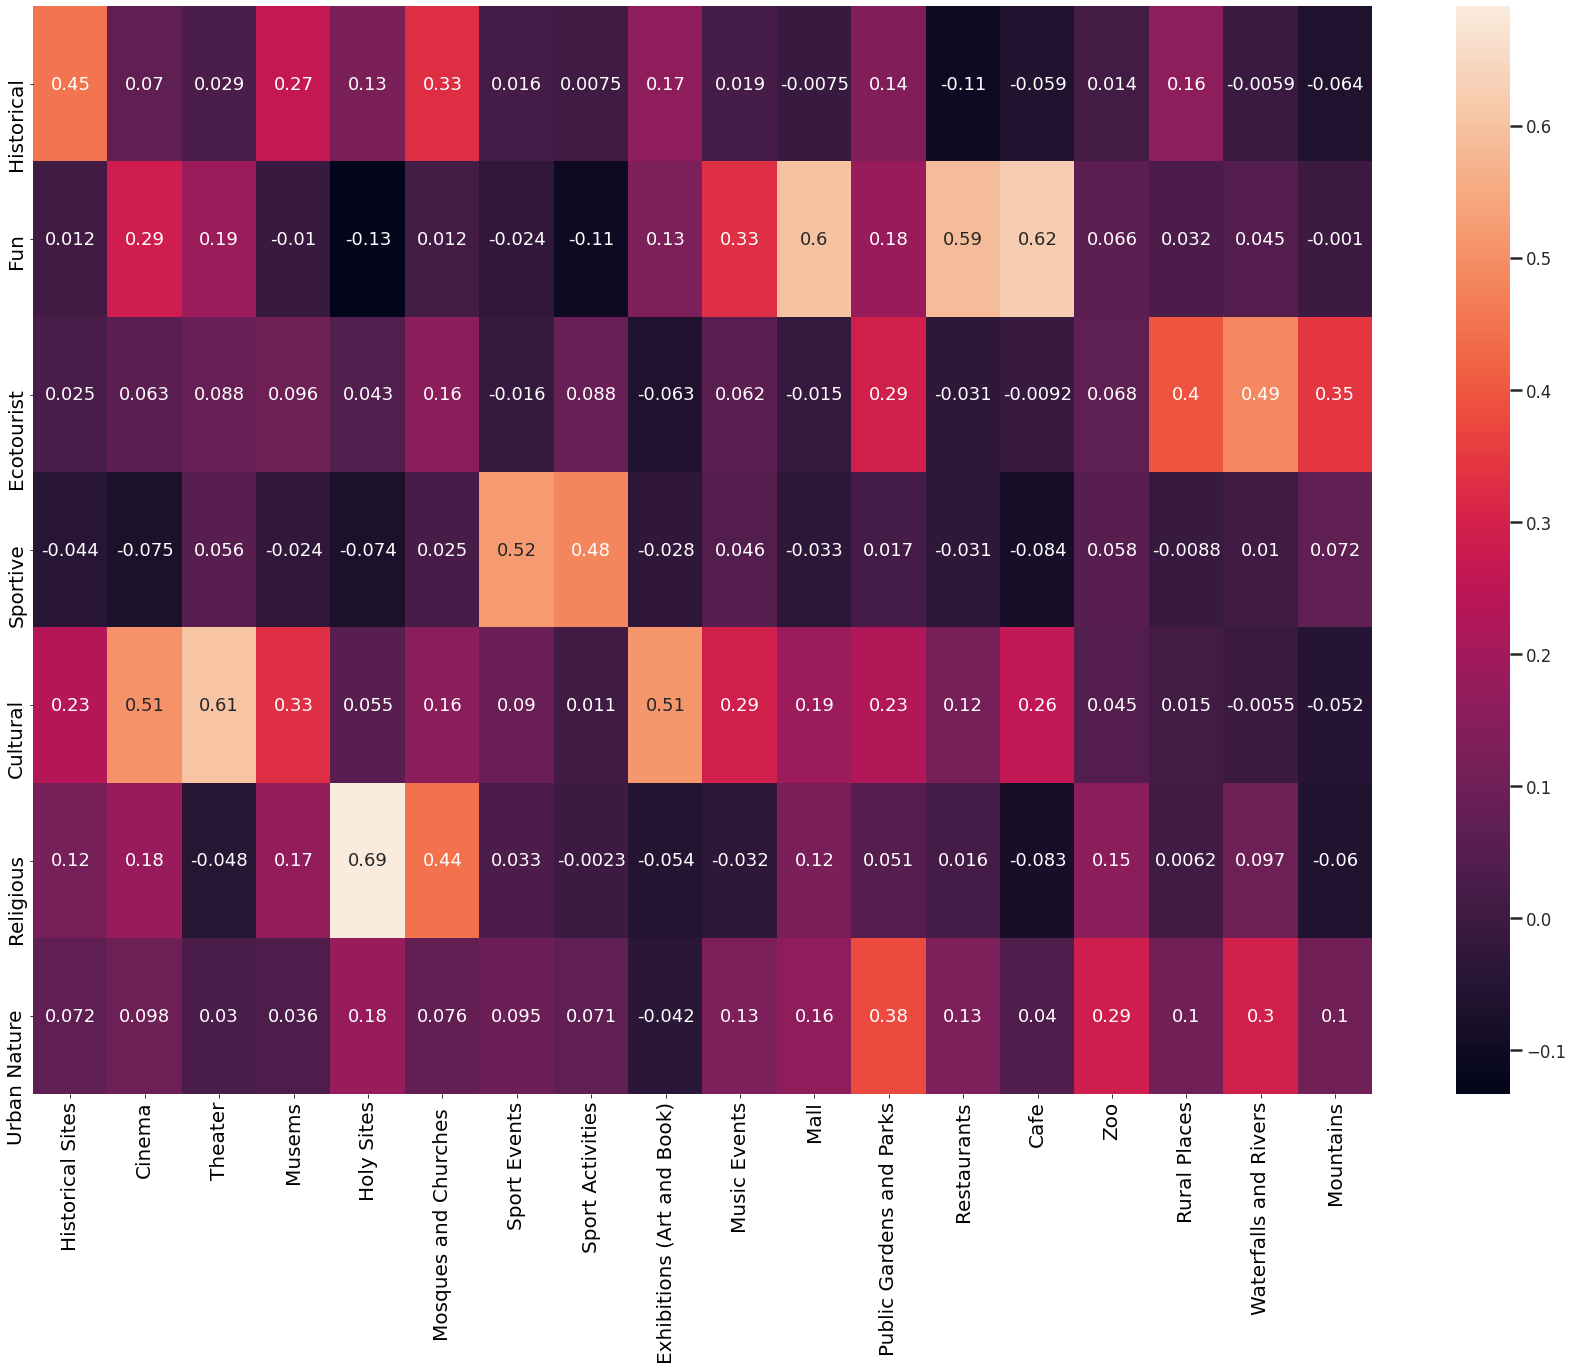

In [ ]:
plt.subplots(figsize=(30,20))
sns.set(context='poster', style='darkgrid', palette='deep', font='sans-serif', font_scale=0.75, color_codes=True, rc=None,)
sns_plot=sns.heatmap(corr,annot=True)
sns_plot.tick_params(labelsize=20)
fig = sns_plot.get_figure()
fig.savefig("outputEvaluation.png")

**Features and Labels**

In [ ]:
Features = np.array(per)
Labels = np.array(act)
print(Features.shape)
print(Labels.shape)

(242, 7)
(242, 18)


**Transforming**

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_validate

scaler = preprocessing.StandardScaler().fit(Features)
Features=scaler.transform(Features)
scoring = ['precision_macro', 'recall_macro','jaccard_macro','f1_macro']

Installing Skmultilearn and Defining metrics

In [ ]:
!pip install scikit-multilearn

In [ ]:
def print_format(f,x,y,z,h):
    print('Fold %2d    %4.3f        %4.3f      %4.3f      %4.3f' % (f, x, y, z,h))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       f1       jaccard')
    [print_format(f,x,y,z,h) for f,x,y,z,h in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_f1_macro'],
                                          scores['test_jaccard_macro'])]
    print('-' * 600)
    print('Mean       %4.3f        %4.3f      %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']),np.mean(scores['test_f1_macro']), np.mean(scores['test_jaccard_macro'])))  
    print('Std        %4.3f        %4.3f      %4.3f      %4.3f' % (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']),np.std(scores['test_f1_macro']), np.std(scores['test_jaccard_macro'])))

**BinaryRelevance**

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = BinaryRelevance(classifier = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100,bootstrap=True,class_weight='balanced'),require_dense = [False, True]) 
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)  

         Precision     Recall       f1       jaccard
Fold  1    0.707        0.648      0.666      0.518
Fold  2    0.796        0.760      0.767      0.635
Fold  3    0.742        0.819      0.775      0.648
Fold  4    0.756        0.758      0.749      0.612
Fold  5    0.737        0.628      0.667      0.525
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.748        0.722      0.725      0.587
Std        0.029        0.073     

In [ ]:
Mean       0.773        0.739      0.754      0.607
Std        0.020        0.070      0.040      0.052

In [ ]:
from sklearn.svm import SVC
clf = BinaryRelevance(classifier = SVC(class_weight='balanced'), require_dense = [False, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)  

         Precision     Recall       f1       jaccard
Fold  1    0.673        0.657      0.658      0.506
Fold  2    0.753        0.714      0.722      0.579
Fold  3    0.725        0.808      0.760      0.632
Fold  4    0.735        0.740      0.733      0.590
Fold  5    0.743        0.658      0.686      0.539
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.726        0.715      0.712      0.569
Std        0.028        0.057     

In [ ]:
Mean       0.751        0.736      0.742      0.591
Std        0.021        0.057      0.033      0.042

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = BinaryRelevance(classifier = LogisticRegression(class_weight='balanced'), require_dense = [False, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.689        0.650      0.661      0.508
Fold  2    0.763        0.747      0.747      0.608
Fold  3    0.728        0.788      0.753      0.620
Fold  4    0.767        0.777      0.761      0.626
Fold  5    0.718        0.643      0.667      0.523
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.733        0.721      0.718      0.577
Std        0.029        0.062     

In [ ]:
Mean       0.760        0.728      0.742      0.592
Std        0.022        0.060      0.038      0.047

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = BinaryRelevance(classifier = GaussianNB(), require_dense = [True, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.695        0.692      0.688      0.550
Fold  2    0.791        0.775      0.769      0.641
Fold  3    0.773        0.778      0.769      0.640
Fold  4    0.757        0.751      0.748      0.626
Fold  5    0.736        0.706      0.693      0.568
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.750        0.740      0.733      0.605
Std        0.033        0.035     

In [ ]:
Mean       0.777        0.794      0.785      0.647
Std        0.023        0.026      0.024      0.032

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = BinaryRelevance(classifier = DecisionTreeClassifier(class_weight='balanced'), require_dense = [False, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)  

         Precision     Recall       f1       jaccard
Fold  1    0.636        0.598      0.611      0.461
Fold  2    0.658        0.656      0.654      0.507
Fold  3    0.698        0.675      0.682      0.542
Fold  4    0.683        0.701      0.687      0.541
Fold  5    0.611        0.604      0.602      0.446
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.657        0.647      0.647      0.499
Std        0.031        0.040     

In [ ]:
Mean       0.694        0.688      0.691      0.528
Std        0.026        0.038      0.030      0.035

**Chainer**

In [ ]:
from skmultilearn.problem_transform import ClassifierChain

In [ ]:
clf = ClassifierChain(classifier = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100,bootstrap=True,class_weight='balanced'), require_dense = [False, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)  

         Precision     Recall       f1       jaccard
Fold  1    0.705        0.602      0.634      0.481
Fold  2    0.770        0.641      0.683      0.536
Fold  3    0.745        0.805      0.768      0.636
Fold  4    0.705        0.638      0.648      0.490
Fold  5    0.709        0.481      0.559      0.406
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.727        0.633      0.658      0.510
Std        0.027        0.104     

In [ ]:
Mean       0.748        0.629      0.678      0.518
Std        0.029        0.114      0.072      0.083

In [ ]:
clf = ClassifierChain(classifier = SVC(class_weight='balanced'), require_dense = [False, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)  

         Precision     Recall       f1       jaccard
Fold  1    0.676        0.635      0.651      0.504
Fold  2    0.784        0.698      0.727      0.582
Fold  3    0.725        0.818      0.764      0.635
Fold  4    0.731        0.690      0.700      0.549
Fold  5    0.707        0.619      0.653      0.501
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.724        0.692      0.699      0.554
Std        0.035        0.070     

In [ ]:
Mean       0.753        0.710      0.729      0.575
Std        0.028        0.070      0.040      0.050

In [ ]:
clf = ClassifierChain(classifier = LogisticRegression(class_weight='balanced',solver='liblinear'), require_dense = [False, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)  

         Precision     Recall       f1       jaccard
Fold  1    0.684        0.645      0.654      0.499
Fold  2    0.763        0.743      0.741      0.600
Fold  3    0.731        0.803      0.760      0.625
Fold  4    0.737        0.726      0.713      0.563
Fold  5    0.677        0.551      0.593      0.439
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.718        0.694      0.692      0.545
Std        0.033        0.087     

In [ ]:
Mean       0.740        0.689      0.711      0.555
Std        0.026        0.093      0.061      0.072

In [ ]:
clf = ClassifierChain(classifier = GaussianNB(), require_dense = [True, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.668        0.602      0.623      0.473
Fold  2    0.726        0.719      0.711      0.561
Fold  3    0.705        0.845      0.763      0.627
Fold  4    0.641        0.582      0.596      0.429
Fold  5    0.646        0.566      0.589      0.426
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.677        0.663      0.656      0.503
Std        0.033        0.106     

In [ ]:
Mean       0.740        0.689      0.711      0.555
Std        0.026        0.093      0.061      0.072

In [ ]:
clf = ClassifierChain(classifier = DecisionTreeClassifier(class_weight='balanced'), require_dense = [False, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.635        0.582      0.604      0.459
Fold  2    0.664        0.645      0.649      0.496
Fold  3    0.694        0.701      0.695      0.556
Fold  4    0.662        0.725      0.688      0.541
Fold  5    0.631        0.709      0.664      0.507
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.657        0.673      0.660      0.512
Std        0.023        0.053     

In [ ]:
Mean       0.700        0.706      0.702      0.542
Std        0.026        0.043      0.028      0.034

**LabelPowerset**

In [ ]:
from skmultilearn.problem_transform import LabelPowerset

In [ ]:
clf = LabelPowerset(classifier=RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100,bootstrap=True,class_weight='balanced') , require_dense = [False, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.565        0.484      0.514      0.380
Fold  2    0.650        0.633      0.633      0.482
Fold  3    0.692        0.699      0.689      0.542
Fold  4    0.626        0.688      0.651      0.495
Fold  5    0.567        0.569      0.564      0.409
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.620        0.615      0.610      0.462
Std        0.049        0.080     

In [ ]:
Mean       0.665        0.656      0.660      0.494
Std        0.035        0.063      0.046      0.051

In [ ]:
clf = LabelPowerset(classifier= SVC(class_weight='balanced'), require_dense = [False, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.623        0.624      0.618      0.474
Fold  2    0.653        0.653      0.650      0.501
Fold  3    0.709        0.690      0.684      0.550
Fold  4    0.665        0.693      0.674      0.528
Fold  5    0.637        0.637      0.633      0.479
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.657        0.659      0.652      0.507
Std        0.029        0.028     

In [ ]:
Mean       0.704        0.714      0.709      0.550
Std        0.025        0.030      0.026      0.032

In [ ]:
clf = LabelPowerset(classifier= LogisticRegression(class_weight='balanced',solver='liblinear'), require_dense = [False, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.630        0.521      0.564      0.415
Fold  2    0.635        0.589      0.604      0.451
Fold  3    0.707        0.679      0.688      0.541
Fold  4    0.661        0.663      0.649      0.499
Fold  5    0.610        0.551      0.573      0.427
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.648        0.601      0.616      0.467
Std        0.033        0.062     

In [ ]:
Mean       0.691        0.635      0.662      0.495
Std        0.023        0.049      0.036      0.040

In [ ]:
clf = LabelPowerset(classifier = GaussianNB(), require_dense = [True, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.605        0.581      0.534      0.419
Fold  2    0.652        0.699      0.582      0.458
Fold  3    0.570        0.570      0.560      0.464
Fold  4    0.653        0.666      0.628      0.486
Fold  5    0.666        0.751      0.665      0.519
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.629        0.654      0.594      0.469
Std        0.036        0.069     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Mean       0.668        0.739      0.699      0.537
Std        0.043        0.060      0.017      0.020

In [ ]:
clf = LabelPowerset(classifier= DecisionTreeClassifier(class_weight='balanced'), require_dense = [False, True])
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.613        0.631      0.617      0.475
Fold  2    0.657        0.649      0.650      0.496
Fold  3    0.686        0.668      0.671      0.527
Fold  4    0.645        0.662      0.650      0.497
Fold  5    0.604        0.662      0.625      0.468
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.641        0.655      0.643      0.493
Std        0.030        0.013     

In [ ]:
Mean       0.671        0.666      0.668      0.502
Std        0.028        0.035      0.026      0.030

**adaptive**

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
clf = BRkNNaClassifier()
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.665        0.605      0.620      0.489
Fold  2    0.779        0.705      0.712      0.577
Fold  3    0.791        0.695      0.712      0.582
Fold  4    0.773        0.683      0.702      0.564
Fold  5    0.648        0.641      0.624      0.489
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.731        0.666      0.674      0.540
Std        0.062        0.037     

In [ ]:
Mean       0.757        0.743      0.750      0.600
Std        0.035        0.023      0.026      0.033

In [ ]:
from skmultilearn.adapt import MLkNN
clf = MLkNN()
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.661        0.625      0.633      0.503
Fold  2    0.731        0.723      0.699      0.564
Fold  3    0.767        0.732      0.729      0.603
Fold  4    0.739        0.698      0.703      0.561
Fold  5    0.644        0.685      0.649      0.512
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.708        0.693      0.683      0.549
Std        0.048        0.038     

In [ ]:
Mean       0.743        0.761      0.752      0.603
Std        0.032        0.026      0.023      0.030

**Enssemble**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(class_weight='balanced',n_estimators=100)
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.653        0.619      0.629      0.493
Fold  2    0.713        0.705      0.703      0.564
Fold  3    0.727        0.728      0.719      0.585
Fold  4    0.697        0.749      0.718      0.578
Fold  5    0.697        0.690      0.683      0.538
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.697        0.698      0.690      0.551
Std        0.025        0.044     

In [ ]:
Mean       0.734        0.748      0.741      0.588
Std        0.020        0.033      0.021      0.026

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight='balanced',n_estimators=100)

scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.666        0.631      0.642      0.503
Fold  2    0.753        0.720      0.724      0.584
Fold  3    0.722        0.721      0.712      0.582
Fold  4    0.711        0.756      0.729      0.591
Fold  5    0.721        0.670      0.674      0.525
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.715        0.699      0.696      0.557
Std        0.028        0.044     

In [ ]:
Mean       0.744        0.762      0.753      0.604
Std        0.017        0.035      0.024      0.030

**KNN Method**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
scores = cross_validate(clf,Features, Labels, cv=5, scoring=scoring)
print_cv(scores)

         Precision     Recall       f1       jaccard
Fold  1    0.649        0.665      0.653      0.513
Fold  2    0.659        0.717      0.683      0.540
Fold  3    0.682        0.674      0.663      0.540
Fold  4    0.659        0.726      0.688      0.544
Fold  5    0.683        0.696      0.676      0.528
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean       0.666        0.696      0.673      0.533
Std        0.014        0.024     

In [ ]:
Mean       0.708        0.756      0.731      0.576
Std        0.019        0.016      0.009      0.011

## **Colaborative Filtering** 

In [ ]:
!pip install surprise

In [ ]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
def df_to_nx(df):

    ######
    df_len=df.shape[0]
    df_fe=df.shape[1]
    zip_list=[]
    ######
    for e in range(df_len):
        zip_obj=zip(np.full(df_fe,e+1, dtype='i'),df.iloc[e,:].keys(),df.iloc[e,:].values)
        for obj in zip_obj:
            zip_list.append(obj)
    ######
    nx_df=pd.DataFrame(zip_list, columns = ['userID','itemID','rating'])
    ######

    return (nx_df)

In [ ]:
act.head()

,Historical Sites,Cinema,Theater,Musems,Holy Sites,Mosques and Churches,Sport Events,Sport Activities,Exhibitions (Art and Book),Music Events,Mall,Public Gardens and Parks,Restaurants,Cafe,Zoo,Rural Places,Waterfalls and Rivers,Mountains
0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1
1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1,1
2,1,0,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,1
3,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0
4,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0


In [ ]:
data=df_to_nx(act)

In [ ]:
data

,userID,itemID,rating
0,1,Historical Sites,1
1,1,Cinema,0
2,1,Theater,1
3,1,Musems,1
4,1,Holy Sites,0
...,...,...,...
4351,242,Cafe,1
4352,242,Zoo,1
4353,242,Rural Places,1
4354,242,Waterfalls and Rivers,1


In [ ]:
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(data[['userID', 'itemID', 'rating']], reader)

In [ ]:
data

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
algo = SVD()

In [ ]:
for thr in [0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.60,0.65,0.70]:
    print(str(thr),'----------------')
    pre=[]
    rec=[]
    fscore=[]
    np.random.seed(42)
    for trainset, testset in kf.split(data):
        y=[]
        yt=[]
        algo.fit(trainset)
        predictions = algo.test(testset)
        for e in range(len(predictions)):
            y.append(predictions[e][2])
            if predictions[e][3]>thr:
                yt.append(1.0)
            else:
                yt.append(0.0)
        pre.append(precision_score(y,yt,average='macro'))
        rec.append(recall_score(y,yt,average='macro'))
        fscore.append(f1_score(y,yt,average='macro'))
    print('Precision  ',np.mean(pre))
    print('Recall  ',np.mean(rec))
    print('F1-Score  ',np.mean(fscore))
    # print('F1-Score',f1_score(y,yt,average='micro'))
    # print('precison',precision_score(y,yt))
    # print('Recall',recall_score(y,yt))

0.25 ----------------
Precision   0.6940061775598384
Recall   0.5866494981820484
F1-Score   0.5352516874268769
0.3 ----------------
Precision   0.684926587486509
Recall   0.6080886664033314
F1-Score   0.575801763759886
0.35 ----------------
Precision   0.6866168083776995
Recall   0.6341859627586097
F1-Score   0.6173615038366045
0.4 ----------------
Precision   0.6976917822372043
Recall   0.6660333737818489
F1-Score   0.6601593366402092
0.45 ----------------
Precision   0.693912180809843
Recall   0.6800043604001191
F1-Score   0.6790700753219945
0.5 ----------------
Precision   0.6948156846049187
Recall   0.6924592587318567
F1-Score   0.692893696175259
0.55 ----------------
Precision   0.6980161821838108
Recall   0.6988481992505952
F1-Score   0.6969269927679337
0.6 ----------------
Precision   0.7039619362543308
Recall   0.6986337340212909
F1-Score   0.6905866821859556
0.65 ----------------
Precision   0.699132691579193
Recall   0.6787055162675028
F1-Score   0.6606015890593392
0.7 ------

In [ ]:
algo = KNNBasic()

In [ ]:
for thr in [0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.60,0.65,0.70]:
    print(str(thr),'----------------')
    pre=[]
    rec=[]
    fscore=[]
    np.random.seed(42)
    for trainset, testset in kf.split(data):
        y=[]
        yt=[]
        algo.fit(trainset)
        predictions = algo.test(testset)
        for e in range(len(predictions)):
            y.append(predictions[e][2])
            if predictions[e][3]>thr:
                yt.append(1.0)
            else:
                yt.append(0.0)
        pre.append(precision_score(y,yt,average='macro'))
        rec.append(recall_score(y,yt,average='macro'))
        fscore.append(f1_score(y,yt,average='macro'))
    print('Precision  ',np.mean(pre))
    print('Recall  ',np.mean(rec))
    print('F1-Score  ',np.mean(fscore))

0.25 ----------------
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Precision   0.7371313796432929
Recall   0.6186745854454605
F1-Score   0.5790342989168624
0.3 ----------------
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Precision   0.7361828216399765
Recall   0.6508108172731093
F1-Score   0.6290379361876937
0.35 ----------------
Computing the msd similarit

In [ ]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y, yt)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       387                14
Actual negative       364               106

Accuracy  0.57
 
           Positive      Negative
Num case      401           470
Precision    0.52          0.88
Recall       0.97          0.23
F1           0.67          0.36


In [ ]:
f1_score(y,yt,average='micro')

0.56601607347876

In [ ]:
precision_score(y,yt,average='micro')

0.56601607347876

In [ ]:
recall_score(y,yt,average='micro')

0.56601607347876